# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls. Think: how do you do anything successively?
* Make sure each city in your dataset includes coordinates, country, max temperature, pressure, humidity and wind speed
* Use a try-except to handle errors (they will occur)
* Include a print log of each city as it'sbeing processed (with the city number and city name). City number is just going to count which city is being processed 


In [37]:


cities_weather= {'City':[], 'Country': [], 'Longitude': [], 'Latitude': [], 'Date/Time': [], 'Max Temperature': [], 'Cloudiness': [], 'Humidity': [], 'Pressure': [], 'Wind Speed':[]}

for city in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
    
    try:
        
        req = requests.get(base_url + f'&q={city}')
        
        data = req.json()

        cities_weather['City'].append(data['name'])
        cities_weather['Country'].append(data['sys']['country'])
        cities_weather['Longitude'].append(data['coord']['lon'])
        cities_weather['Latitude'].append(data['coord']['lat'])
        cities_weather['Date/Time'].append(data['dt'])
        cities_weather['Max Temperature'].append(data['main']['temp_max'])
        cities_weather['Cloudiness'].append(data['clouds']['all'])
        cities_weather['Humidity'].append(data['main']['humidity'])
        cities_weather['Pressure'].append(data['main']['pressure'])
        cities_weather['Wind Speed'].append(data['wind']['speed'])
 
        print("processing " + city)
    except:
        print(city+ " not found")
        pass



processing rikitea
processing ancud
processing punta arenas
processing sinjar
processing lebu
processing tuktoyaktuk
processing cherskiy
processing ribeira grande
processing saint-georges
processing jamestown
illoqqortoormiut not found
processing sadiqabad
processing lata
processing aykhal
processing bredasdorp
processing atuona
processing busselton
processing cheremukhovo
processing odenthal
processing olinda
processing eureka
processing kapaa
processing bambous virieux
processing severo-kurilsk
processing afonso claudio
processing iqaluit
processing leningradskiy
processing batagay
processing santa rosa
processing port alfred
processing mangrol
processing mapiri
processing bafoulabe
processing yellowknife
processing albany
processing ilulissat
processing chuy
processing dunedin
processing hobart
processing upernavik
processing hermanus
processing namibe
processing ligayan
processing ushuaia
processing kaitangata
processing namatanai
processing cape town
processing norman wells
proces

In [38]:
cities_weather

{'City': ['Rikitea',
  'Ancud',
  'Punta Arenas',
  'Sinjār',
  'Lebu',
  'Tuktoyaktuk',
  'Cherskiy',
  'Ribeira Grande',
  "St. George's",
  'Jamestown',
  'Saddiqabad',
  'Lata',
  'Aykhal',
  'Bredasdorp',
  'Atuona',
  'Busselton',
  'Cherëmukhovo',
  'Odenthal',
  'Olinda',
  'Eureka',
  'Kapaa',
  'Bambous Virieux',
  "Severo-Kuril'sk",
  'Afonso Cláudio',
  'Iqaluit',
  'Leningradskiy',
  'Batagay',
  'Santa Rosa',
  'Port Alfred',
  'Māngrol',
  'Mapiri',
  'Bafoulabé',
  'Yellowknife',
  'Albany',
  'Ilulissat',
  'Chui',
  'Dunedin',
  'Hobart',
  'Upernavik',
  'Hermanus',
  'Mossamedes',
  'Ligayan',
  'Ushuaia',
  'Kaitangata',
  'Namatanai',
  'Cape Town',
  'Norman Wells',
  'Saint Paul Harbor',
  'Dikson',
  'Bengkulu',
  'Vaini',
  'Barrow',
  'Provideniya',
  'Tatarskaya Kargala',
  'Hithadhoo',
  'Kavaratti',
  'Rincon',
  'Avera',
  'Dandong',
  'Ushtobe',
  'Bluff',
  'Egvekinot',
  'Tura',
  'Portland',
  'Castro',
  'Falmouth',
  'Butaritari',
  'Ca Mau',
  'Gao

### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected

In [42]:
#display the data frame
weather_df = pd.DataFrame.from_dict(cities_weather)
weather_df


,City,Country,Longitude,Latitude,Date/Time,Max Temperature,Cloudiness,Humidity,Pressure,Wind Speed
0,Rikitea,PF,-134.9692,-23.1203,1634758685,74.25,6,75,1022,19.57
1,Ancud,CL,-73.8203,-41.8697,1634758685,60.42,100,86,1019,10.04
2,Punta Arenas,CL,-70.9167,-53.1500,1634758685,53.71,20,35,1000,32.21
3,Sinjār,IQ,41.8754,36.3209,1634758686,68.25,4,27,1018,8.90
4,Lebu,CL,-73.6500,-37.6167,1634758686,56.86,48,78,1020,8.81
...,...,...,...,...,...,...,...,...,...,...
574,Vilcún,CL,-72.2333,-38.6500,1634758871,56.14,20,52,1017,6.38
575,Padang,ID,100.3543,-0.9492,1634758871,75.25,100,91,1013,4.90
576,Swan River,CA,-101.2676,52.1058,1634758871,39.09,3,56,1030,3.44
577,Chilliwack,CA,-121.9443,49.1747,1634758578,55.92,100,95,1008,1.14


In [57]:
time.ctime(int("1634758685"))

'Wed Oct 20 14:38:05 2021'

In [6]:
#export to csv
weather_df.to_csv('cities_weather_df.CSV', index= False)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* Save the plotted figures as .pngs and embed those pngs in your readme file.

#### Latitude vs. Temperature Plot

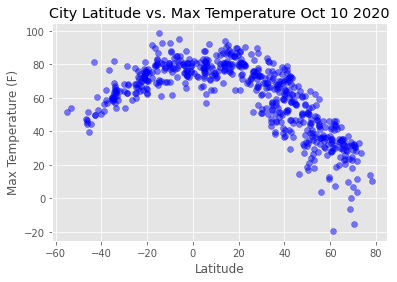

In [63]:
#plot latitude vs max_temp
fig, ax = plt.subplots()
ax.scatter(x= weather_df['Latitude'], y= weather_df['Max Temperature'], c='blue', marker= 'o', alpha= 0.5)
ax.set(title='City Latitude vs. Max Temperature Oct 10 2020', ylabel='Max Temperature (F)', xlabel='Latitude')
plt.tick_params(labelsize=10)
plt.style.use('ggplot')
fig.savefig("lat_maxtemp.png")
plt.show()

#### Latitude vs. Humidity Plot

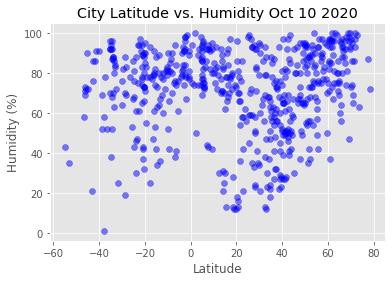

In [62]:
#plot latitude vs humidity
fig, ax = plt.subplots()
ax.scatter(x= weather_df['Latitude'], y= weather_df['Humidity'], c='blue', marker= 'o', alpha= 0.5)
ax.set(title='City Latitude vs. Humidity Oct 10 2020', ylabel='Humidity (%)', xlabel='Latitude')
plt.tick_params(labelsize=10)
plt.style.use('ggplot')
fig.savefig("lat_hum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

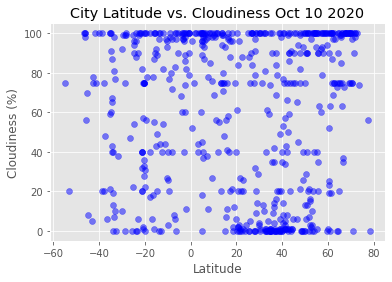

In [61]:
#plot latitude vs cloudiness
fig, ax = plt.subplots()
ax.scatter(x= weather_df['Latitude'], y= weather_df['Cloudiness'], c='blue', marker= 'o', alpha= 0.5)
ax.set(title='City Latitude vs. Cloudiness Oct 10 2020', ylabel='Cloudiness (%)', xlabel='Latitude')
plt.tick_params(labelsize=10)
plt.style.use('ggplot')
fig.savefig("lat_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

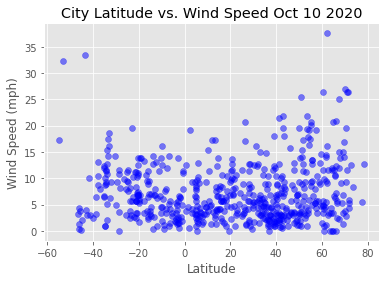

In [60]:
#plot latitude vs Wind speed
fig, ax = plt.subplots()
ax.scatter(x= weather_df['Latitude'], y= weather_df['Wind Speed'], c='blue', marker= 'o', alpha= 0.5)
ax.set(title='City Latitude vs. Wind Speed Oct 10 2020', ylabel='Wind Speed (mph)', xlabel='Latitude')
plt.tick_params(labelsize=10)
plt.style.use('ggplot')
fig.savefig("lat_wind.png")
plt.show()

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

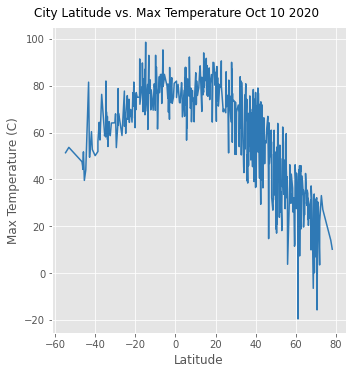

In [59]:
#plot latitude vs max_temp
g = sns.relplot(x= "Latitude", y= "Max Temperature", data = weather_df, kind='line', markers= True)
sns.set_palette('RdBu_r')
g.set(ylabel= 'Max Temperature (C)')
g.fig.suptitle('City Latitude vs. Max Temperature Oct 10 2020', y= 1.03)
fig.savefig("lat_maxtempsb.png")
plt.show()

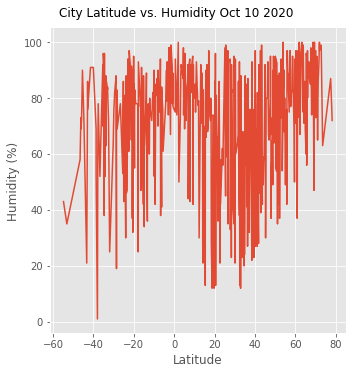

In [58]:
#plot latitude vs humidity
g = sns.relplot(x= "Latitude", y= "Humidity", data = weather_df, kind='line', markers= True)
sns.set_palette('RdBu_r')
g.set(ylabel= 'Humidity (%)')
g.fig.suptitle('City Latitude vs. Humidity Oct 10 2020', y= 1.03)
fig.savefig("lat_humsb.png")
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

Max temperature and distance from equator have a clear correlation, where the closer you are to the equator, the higher the temperatures. Cloudiness, humidity and wind speed show no direct correlation with latitude, they were scattered across the graph irrespctive of distance from equator. 

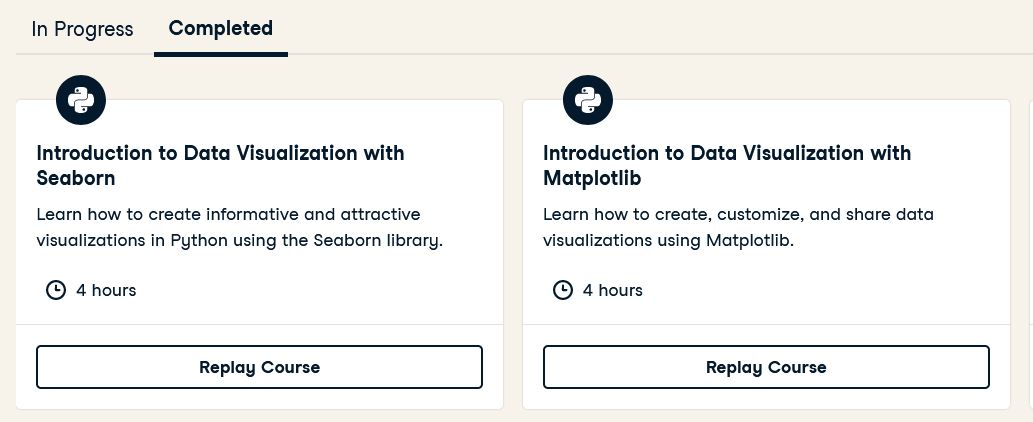

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 